In [1]:
import os
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
import pydicom
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def convertNsave(arr,file_dir, index=0):
    dicom_file = pydicom.dcmread('D:/image.0065.dcm')
    arr = arr.astype('uint16')
    dicom_file.Rows = arr.shape[0]
    dicom_file.Columns = arr.shape[1]
    dicom_file.PhotometricInterpretation = "MONOCHROME2"
    dicom_file.SamplesPerPixel = 1
    dicom_file.BitsStored = 16
    dicom_file.BitsAllocated = 16
    dicom_file.HighBit = 15
    dicom_file.PixelRepresentation = 1
    dicom_file.PixelData = arr.tobytes()
    dicom_file.save_as(os.path.join(file_dir, f'slice{index}.dcm'))

In [3]:
# 載入nifti
def nifti2dicom_1file(nifti_dir, out_dir):
    nifti_file = nib.load(nifti_dir)
    nifti_array = nifti_file.get_fdata()
    number_slices = nifti_array.shape[2]

    for slice_ in tqdm(range(number_slices)):
        convertNsave(nifti_array[:,:,slice_], out_dir, slice_)


def nifti2dicom_mfiles(nifti_dir, out_dir=''):
    files = os.listdir(nifti_dir)
    for file in files:
        in_path = os.path.join(nifti_dir, file)
        out_path = os.path.join(out_dir, file)
        os.mkdir(out_path)
        nifti2dicom_1file(in_path, out_path)

In [5]:
nifti_path = "D:/IACTA/task1/imgTr/label/" 
dicom_path = "D:/test/mask/"
os.makedirs(dicom_path,exist_ok=True)
nifti2dicom_mfiles(nifti_path,dicom_path)

100%|██████████| 133/133 [00:00<00:00, 187.92it/s]


(146, 182, 133)


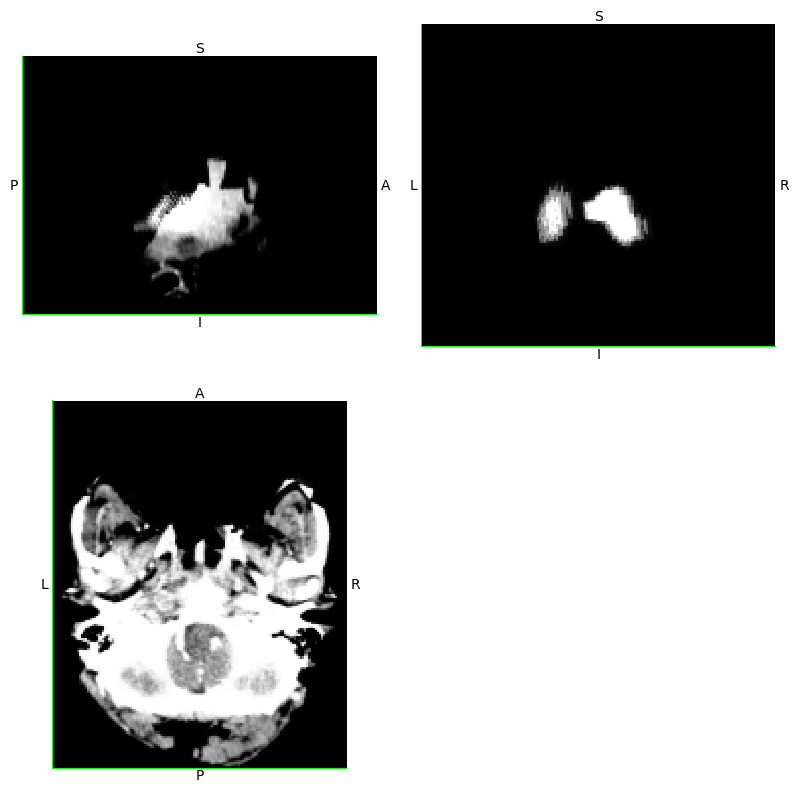

In [8]:
nifti = nib.load("D:/IACTA/task1/test/sub-0901.nii.gz")
print(nifti.dataobj.shape)
nifti_view = OrthoSlicer3D(nifti.dataobj[:,:,])
nifti_view.set_position(0,0,0)
nifti_view.show()

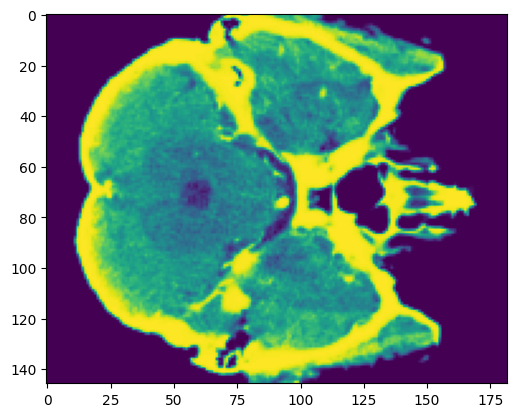

In [45]:
dcm = pydicom.dcmread('D:/IACTA/task1/test/sub-0002.nii.gz/slice20.dcm')
plt.imshow(dcm.pixel_array)
plt.show()